In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data= pd.read_csv('Fraud_check.csv')

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.shape

(600, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 

In [9]:
data['Undergrad'].unique()

array([0, 1])

In [15]:
data['Undergrad'].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

In [10]:
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 

In [11]:
data['Marital.Status'].unique()

array([2, 0, 1])

In [16]:
data['Marital.Status'].value_counts()

2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [12]:
data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [13]:
data['Urban'].unique()

array([1, 0])

In [17]:
data['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [22]:
data['Taxable.Income']=pd.cut(data['Taxable.Income'], bins=[0,30000,100000], labels=['risky','good'])

In [23]:
data['Taxable.Income'].value_counts()

good     476
risky    124
Name: Taxable.Income, dtype: int64

In [24]:
data.shape

(600, 6)

In [25]:
data['Taxable.Income']= label_encoder.fit_transform(data['Taxable.Income']) 

In [26]:
data['Taxable.Income'].unique()

array([0, 1])

In [27]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [28]:
colnames = list(data.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [29]:
x= data[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]
y=data['Taxable.Income']

In [30]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [31]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

In [32]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [33]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

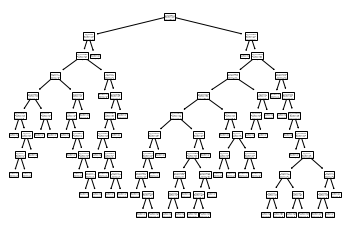

In [34]:
tree.plot_tree(model);

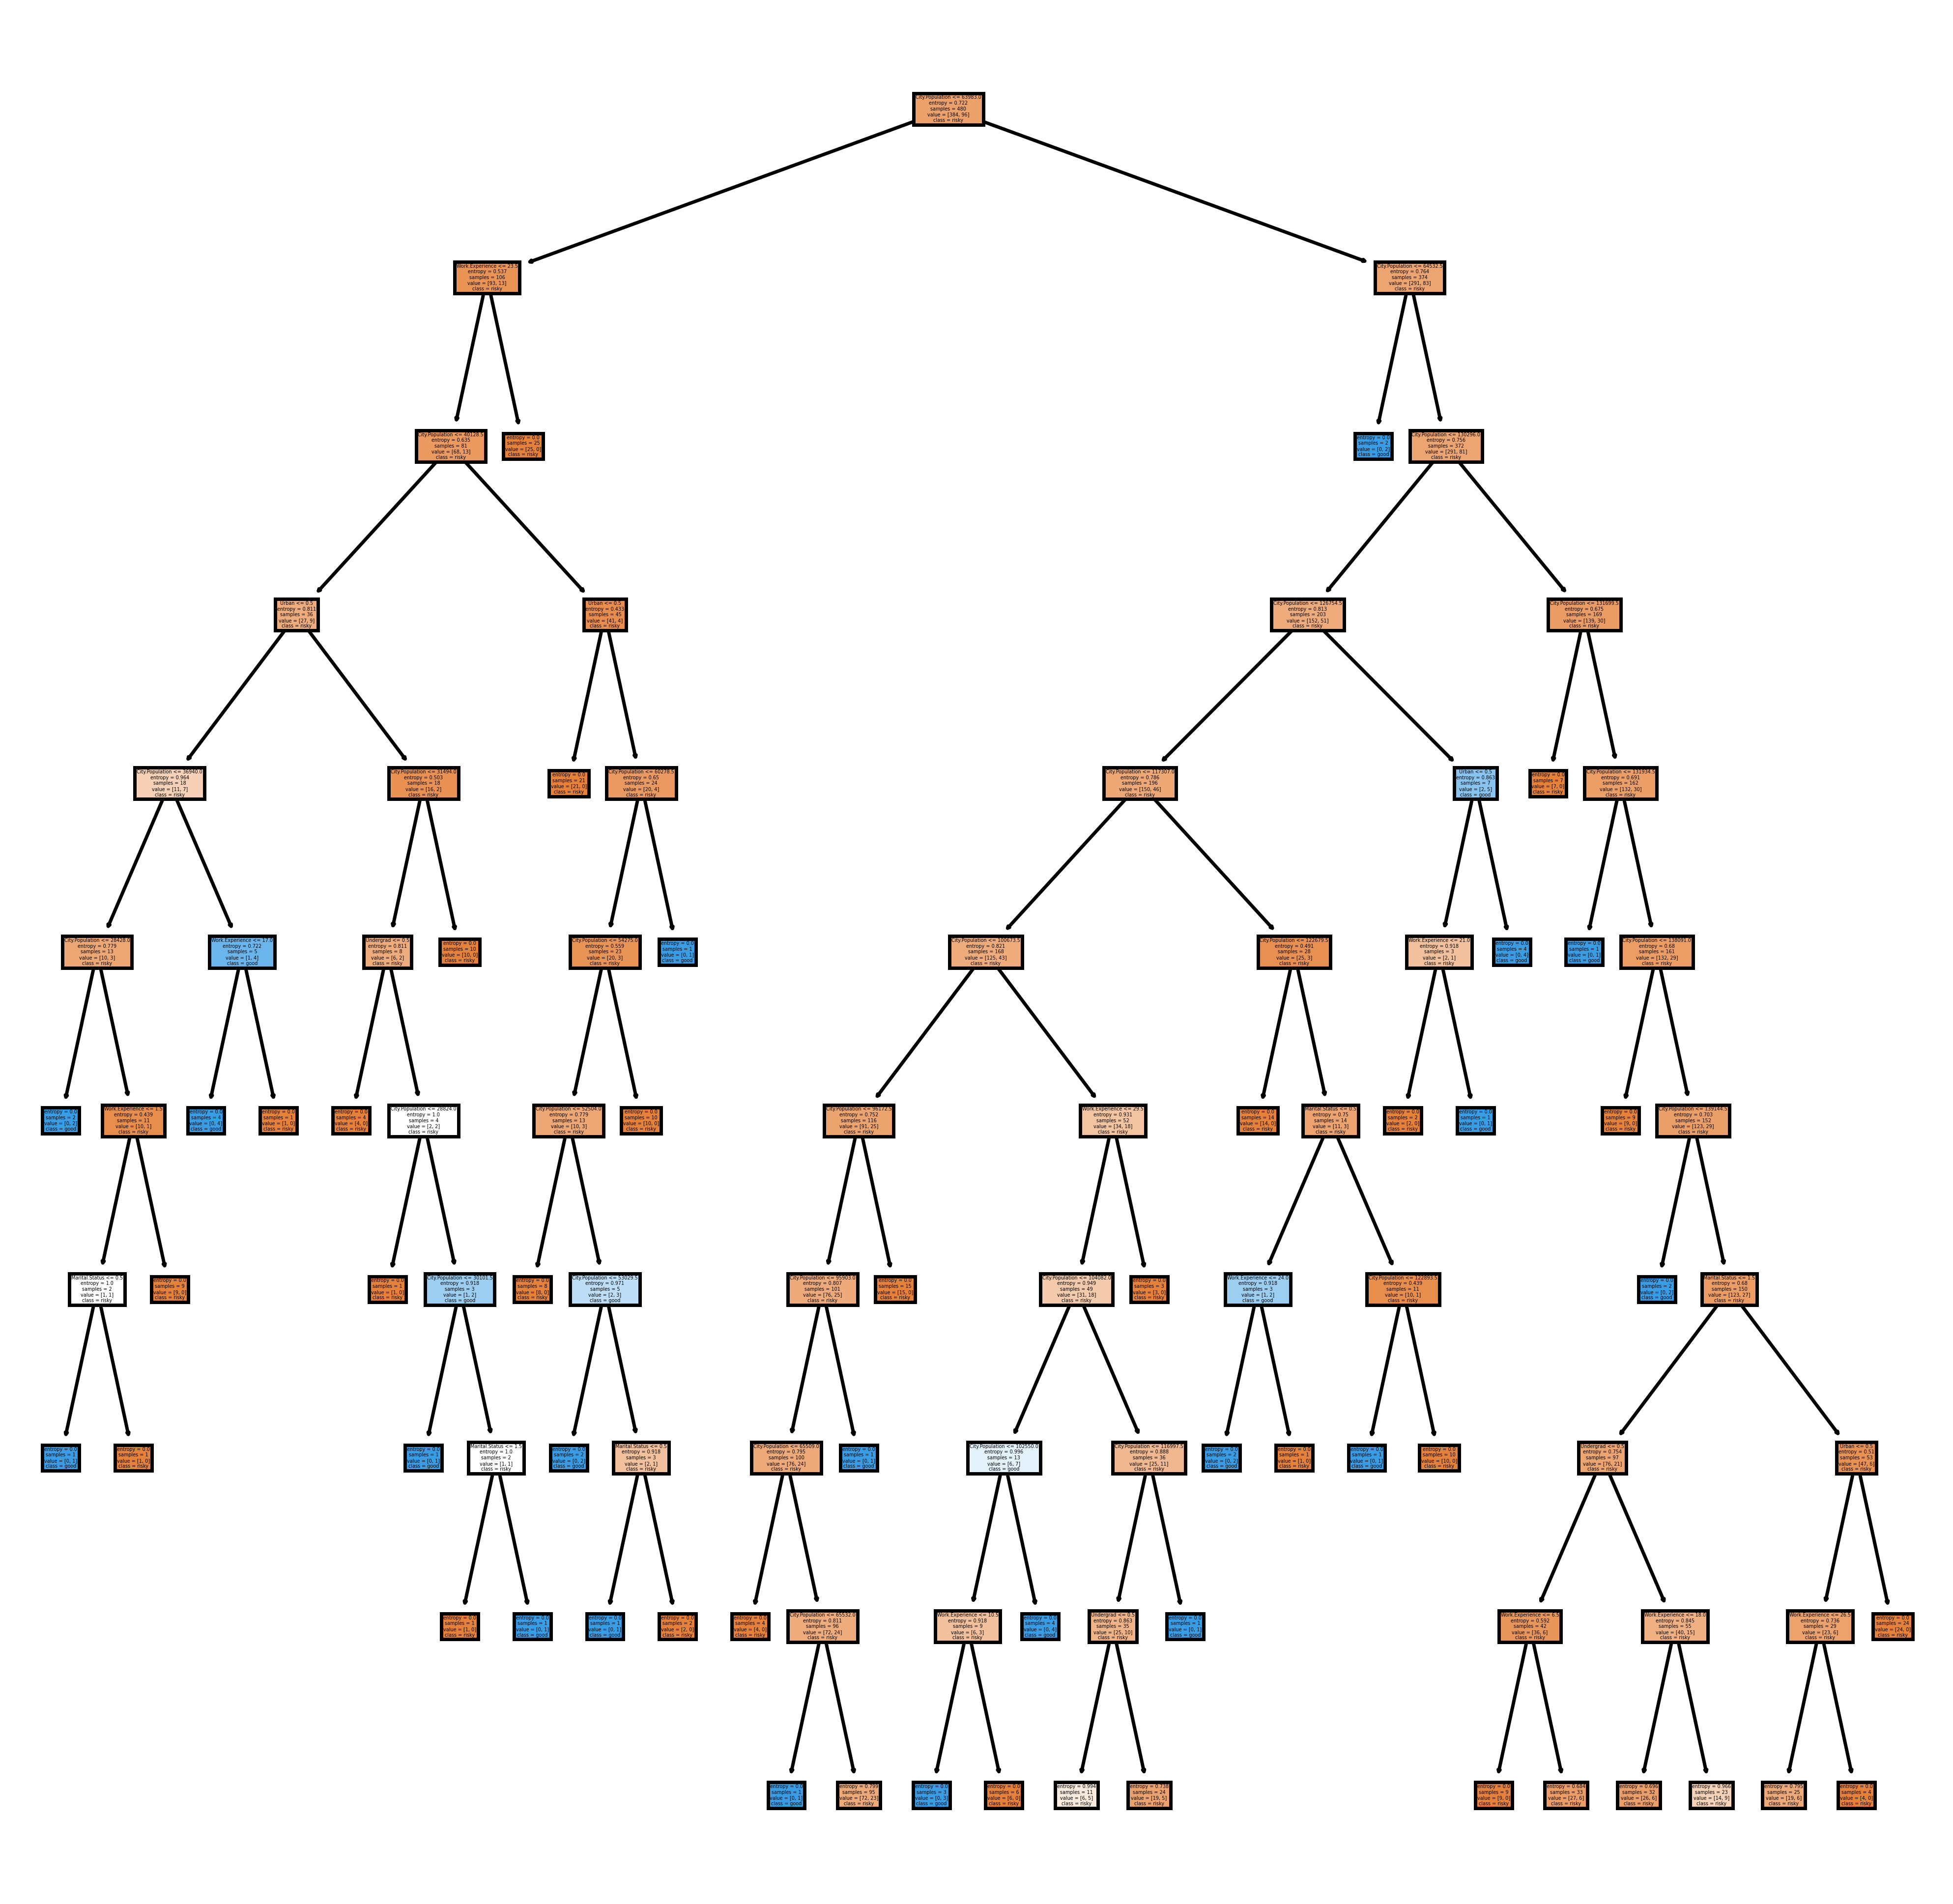

In [35]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['risky','good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [36]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

0    110
1     10
dtype: int64

In [37]:
preds

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [38]:
pd.crosstab(y_test,preds)

col_0,0,1
Taxable.Income,,
0,84,8
1,26,2


In [39]:
np.mean(preds==y_test)

0.7166666666666667